In [1]:
import numpy as np
import pandas as pd
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string


In [2]:
df = pd.read_csv("spam.csv", encoding=("ISO-8859-1"))

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. data cleaning(removing nan values)
#2. EDA(expodetarry data analysis)
#3. text preprocessing
#4. model building
#5. evaluation of model
#6. improvement 
#7. website building
#8. deploy

1. data cleaning

In [6]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
2209,ham,"Hmm well, night night"
5329,ham,"Sir, waiting for your letter."
4475,ham,I'll pick you up at about 5.15pm to go to taun...
3735,ham,Hows the street where the end of library walk is?
4827,ham,Lol no. Just trying to make your day a little ...


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

# 2. EDA


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

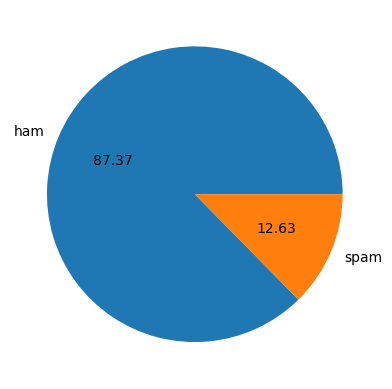

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [19]:
#data is imbalanced

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dheeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters']=df['text'].apply(len)


C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_19492\2885386485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#num of words 
nltk.download('punkt_tab')
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dheeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [25]:
df['num_words']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_19492\2884152807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [26]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_19492\2633150839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

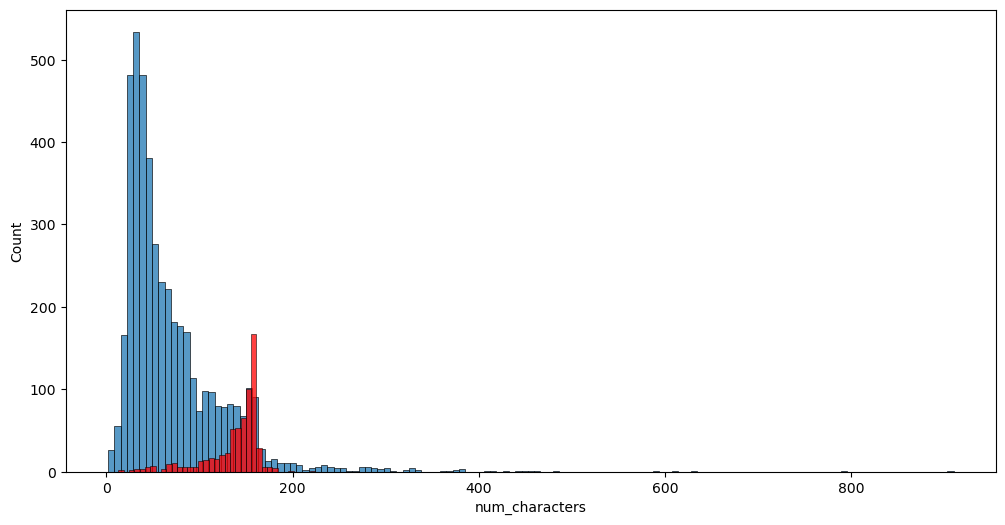

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

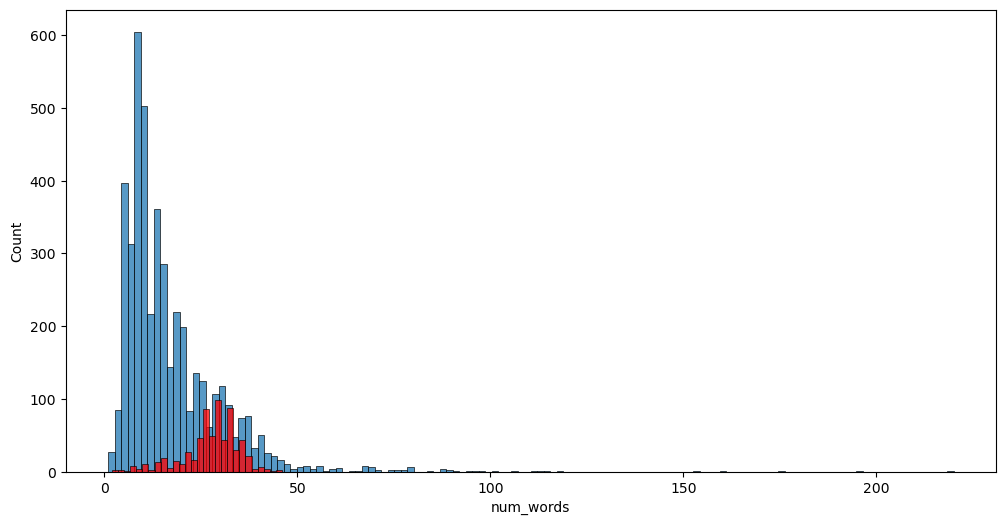

In [100]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

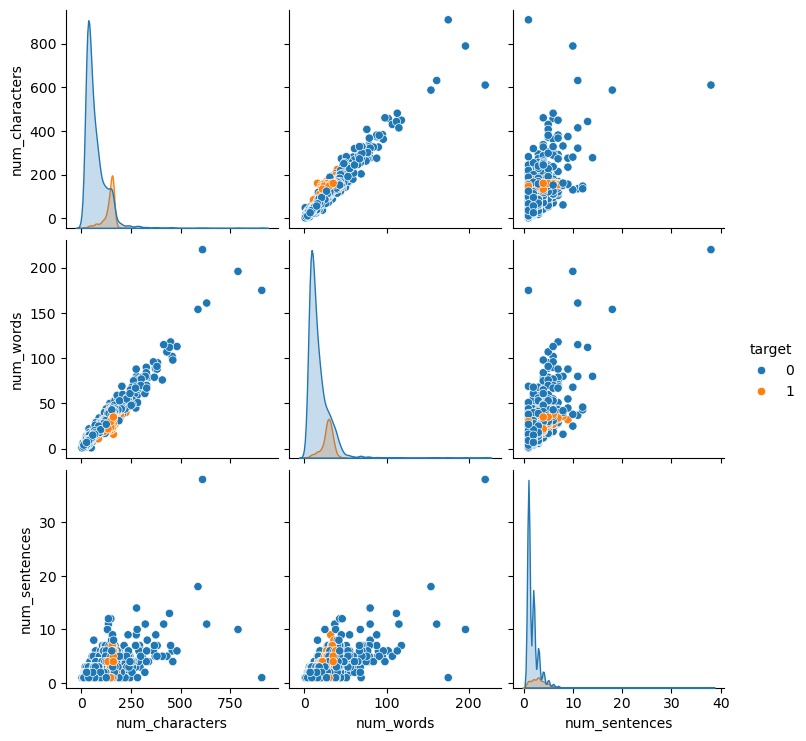

In [35]:
sns.pairplot(df,hue='target')

In [36]:
#sns.heatmap(df.corr(),annot=True)

### 3. data preprocessing
1. lower case

2. tokenization
3. removing special charectors
4. removing stop words and punctuations
5. stemming

In [104]:


ps= PorterStemmer()
ps.stem('lovely')



'love'

In [38]:
def transform_text(text):
    text=text.lower()  
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
!pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:

from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [44]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

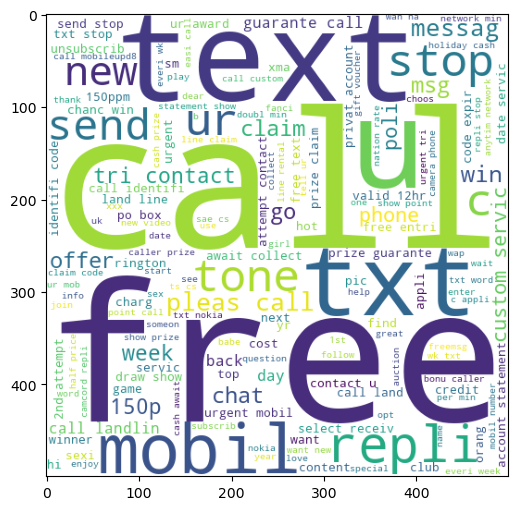

In [45]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

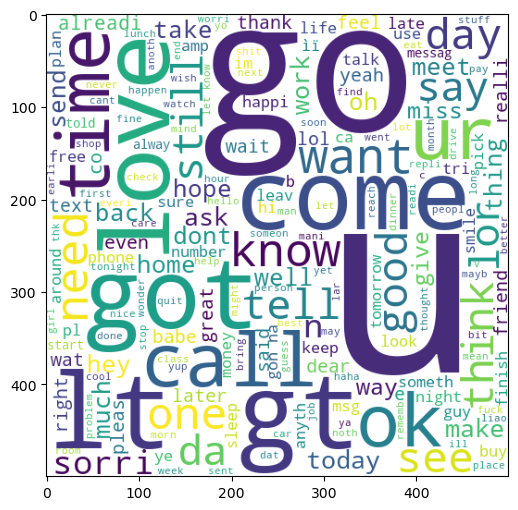

In [47]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [50]:
len(spam_corpus)

9939

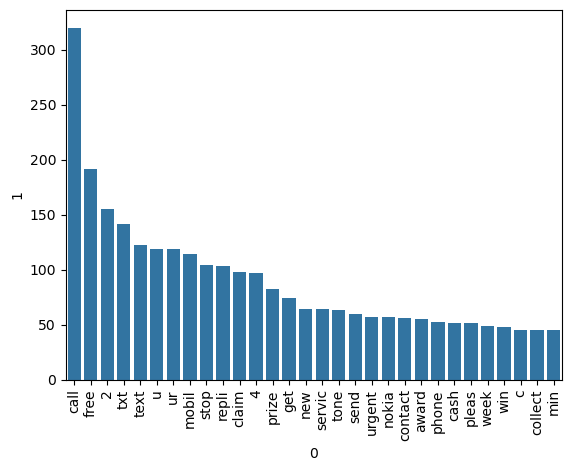

In [51]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [53]:
len(ham_corpus)

35404

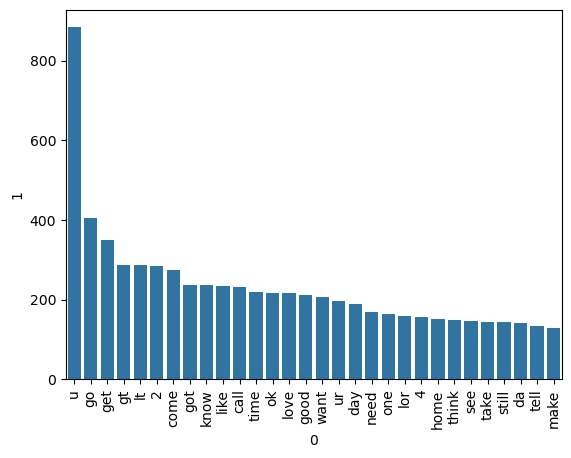

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. model building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [56]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
#from sklearn.preprocessing import MinMaxScaler
#scaler= MinMaxScaler()
#x=scaler.fit_transform(x)

In [58]:
#x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [59]:
y=df['target'].values

In [60]:
x.shape

(5169, 3000)

In [61]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [65]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()


In [66]:
'''gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) '''


'gnb.fit(x_train, y_train)\ny_pred1=gnb.predict(x_test)\nprint(accuracy_score(y_test,y_pred1))\nprint(confusion_matrix(y_test,y_pred1))\nprint(precision_score(y_test,y_pred1)) '

In [67]:
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
'''bnb.fit(x_train, y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
 '''

'bnb.fit(x_train, y_train)\ny_pred3=bnb.predict(x_test)\nprint(accuracy_score(y_test,y_pred3))\nprint(confusion_matrix(y_test,y_pred3))\nprint(precision_score(y_test,y_pred3))\n '

In [69]:
#tfidf--> MNB

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
'''svc= SVC(kernel='sigmoid', gamma = 1.0)
knc= KNeighborsClassifier()
mnb = MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2) '''

"svc= SVC(kernel='sigmoid', gamma = 1.0)\nknc= KNeighborsClassifier()\nmnb = MultinomialNB()\ndtc= DecisionTreeClassifier(max_depth=5)\nlrc= LogisticRegression(solver='liblinear', penalty='l1')\nrfc= RandomForestClassifier(n_estimators=50, random_state=2)\nabc= AdaBoostClassifier(n_estimators=50, random_state=2)\nbc= BaggingClassifier(n_estimators=50, random_state=2)\netc=ExtraTreesClassifier(n_estimators=50, random_state=2)\ngbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)\nxgb=XGBClassifier(n_estimators=50, random_state=2) "

In [72]:
 '''clfs= {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
} '''

"clfs= {\n   'SVC' : svc,\n   'KN' : knc,\n   'NB' : mnb,\n   'DT' : dtc,\n   'LR' : lrc,\n   'RF' : rfc,\n   'AdaBoost' : abc,\n   'Bgc' : bc,\n   'ETC' : etc,\n   'GBDT' : gbdt,\n   'xgb' : xgb\n} "

In [73]:
 '''def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision '''

'def train_classifier(clf, x_train, y_train, x_test, y_test):\n   clf.fit(x_train, y_train)\n   y_pred=clf.predict(x_test)\n   accuracy= accuracy_score(y_test, y_pred)\n   precision = precision_score(y_test, y_pred)\n   \n   return accuracy, precision '

In [74]:
#train_classifier(svc,x_train, y_train, x_test, y_test)

In [75]:
 '''accuracy_scores=[]
precision_scores=[]

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision) '''

'accuracy_scores=[]\nprecision_scores=[]\n\nfor name, clf in clfs.items():\n   current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)\n   \n   print("For ", name)\n   print("Accuracy - ", current_accuracy)\n   print("precision - ", current_precision)\n   \n   accuracy_scores.append(current_accuracy)\n   precision_scores.append(current_precision) '

In [76]:
#performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [77]:
#performance_df


In [78]:
#performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [79]:
#performance_df1

In [80]:
 '''sns.catplot(x='Algorithm', y='value',
           hue= 'variable', data= performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show() '''

"sns.catplot(x='Algorithm', y='value',\n          hue= 'variable', data= performance_df1, kind='bar', height=5)\nplt.ylim(0.5,1.0)\nplt.xticks(rotation='vertical')\nplt.show() "

In [81]:
#model improve
#1.change the max_feature parameter of TfIdf

In [82]:
#temp_df= pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_fit_3000': accuracy_scores, 'Precision_max_fit_3000':precision_scores}).sort_values('Precision_max_fit_3000', ascending=False)

In [83]:
#temp_df= pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling':precision_scores}).sort_values('Precision_scaling', ascending=False)

In [84]:
#new_df=performance_df.merge(temp_df, on = 'Algorithm')

In [85]:
#new_df_scaled=new_df.merge(temp_df, on = 'Algorithm')

In [86]:
#new_df_scaled

In [87]:
#voting classifier
'''svc= SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb=MultinomialNB()
etc= ExtraTreesClassifier(n_estimators=50, random_state=2) '''

from sklearn.ensemble import VotingClassifier

In [88]:
#voting= VotingClassifier(estimators=[('svm',svc),('nb', mnb),('et',etc)], voting='soft')

In [89]:
#voting.fit(x_train, y_train)

In [90]:
'''y_pred= voting.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred)) '''

'y_pred= voting.predict(x_test)\nprint("Accuracy", accuracy_score(y_test, y_pred))\nprint("Precision", precision_score(y_test, y_pred)) '

In [91]:
#apply stacking
'''estimators=[('svm',svc),('nb', mnb),('et',etc)]
final_estimator= RandomForestClassifier() '''

"estimators=[('svm',svc),('nb', mnb),('et',etc)]\nfinal_estimator= RandomForestClassifier() "

In [92]:
from sklearn.ensemble import StackingClassifier

In [93]:
#clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [94]:
'''clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred)) '''

'clf.fit(x_train, y_train)\ny_pred=clf.predict(x_test)\nprint("Accuracy", accuracy_score(y_test, y_pred))\nprint("Precision", precision_score(y_test, y_pred)) '

In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
